     weather   soil_pH  previous_yield  current_yield
0  29.528105  7.077981        1.140124      18.414923
1  26.800314  7.246237        1.086409      16.934591
2  27.957476  6.588843        1.613841      17.880551
3  30.481786  6.852357        1.312488      18.896749
4  29.735116  6.914027        1.575757      18.711588


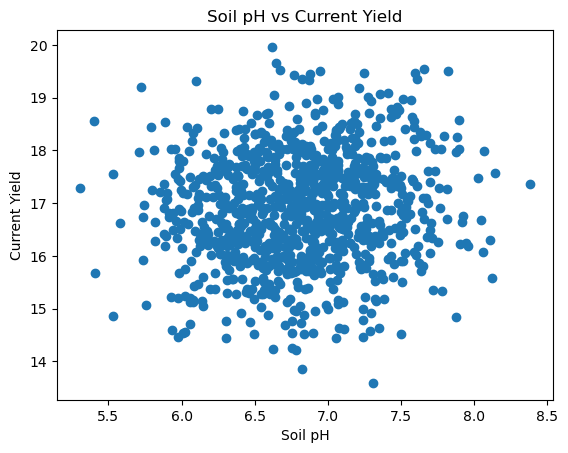

In [2]:
import numpy as np
import pandas as pd

# Generating synthetic data for 1000 farmers
np.random.seed(0)

weather = np.random.normal(26, 2, 1000)  # Average weather around 26°C with a std deviation of 2
soil_pH = np.random.normal(6.8, 0.5, 1000)  # Average soil pH of 6.8 with a std deviation of 0.5
previous_yield = np.random.normal(1.6, 0.3, 1000)  # Average previous yield with a std deviation of 0.3

# Assuming current yield is influenced by weather, soil_pH, and previous_yield with some random noise
current_yield = 1.2 * previous_yield + 0.5 * weather + 0.3 * soil_pH + np.random.normal(0, 0.1, 1000)

data = pd.DataFrame({
    'weather': weather,
    'soil_pH': soil_pH,
    'previous_yield': previous_yield,
    'current_yield': current_yield
})

print(data.head())

# Visualization of soil pH vs. yield
plt.scatter(data['soil_pH'], data['current_yield'])
plt.title('Soil pH vs Current Yield')
plt.xlabel('Soil pH')
plt.ylabel('Current Yield')
plt.show()

           weather      soil_pH  previous_yield  current_yield
count  1000.000000  1000.000000     1000.000000    1000.000000
mean     25.909487     6.806808        1.584631      16.896449
std       1.975054     0.484322        0.286378       1.045431
min      19.907714     5.302694        0.664943      13.589346
25%      24.603160     6.473075        1.379001      16.194644
50%      25.883944     6.813031        1.584251      16.911056
75%      27.213901     7.112740        1.786485      17.586951
max      31.518710     8.385487        2.478729      19.964716


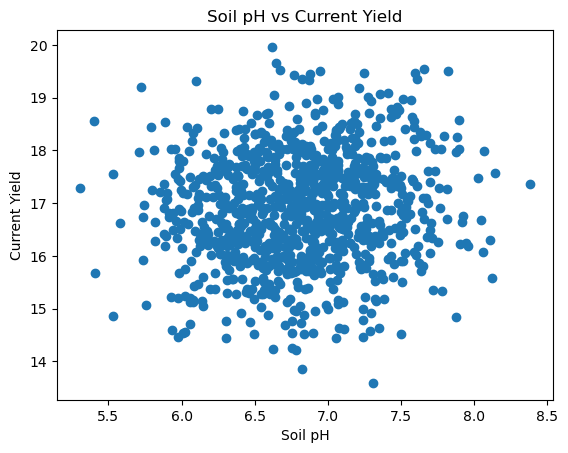

In [4]:
import matplotlib.pyplot as plt

# Basic EDA
print(data.describe())

# Visualization of soil pH vs. yield
plt.scatter(data['soil_pH'], data['current_yield'])
plt.title('Soil pH vs Current Yield')
plt.xlabel('Soil pH')
plt.ylabel('Current Yield')
plt.show()

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 291.7467 - val_loss: 288.3237
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 281.0981 - val_loss: 278.6493
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 271.5692 - val_loss: 269.3362
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 261.7859 - val_loss: 259.0210
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 250.6834 - val_loss: 247.0613
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 237.6472 - val_loss: 232.8540
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 222.0746 - val_loss: 215.5223
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 203.3776 - val_loss: 195.2658
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 181.8811 - val_loss: 172.3834
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 158.1467

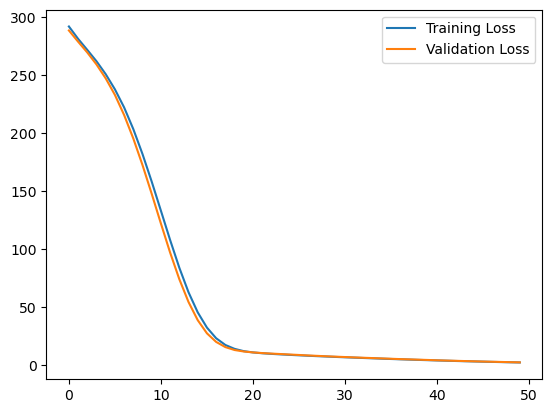

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing data
features = data[['weather', 'soil_pH', 'previous_yield']]
labels = data['current_yield']

# Standardizing the features
scaler = StandardScaler().fit(features)
features_standardized = scaler.transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_standardized, labels, test_size=0.2)

# Building a deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Training the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Visualizing the model's training progress
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [9]:
# Let's take a subset of the original synthetic data as new data for demonstration
new_data = features.iloc[:10]

new_data_standardized = scaler.transform(new_data)
predictions = model.predict(new_data_standardized)
print(predictions)

1/1 [==============================] - 0s 82ms/step
[[20.112194]
 [17.000933]
 [16.67338 ]
 [20.32801 ]
 [18.919003]
 [14.006863]
 [16.187248]
 [17.867325]
 [15.477581]
 [16.91893 ]]


In [10]:
from sklearn.metrics import mean_squared_error

# Getting predictions for the test set
y_pred = model.predict(X_test)

# Calculating the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

7/7 [==============================] - 0s 2ms/step
RMSE: 1.5862316799611307
